In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
path = r"DataSet\Train_data.csv"
df = pd.read_csv(path, on_bad_lines='skip', engine='python')
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [5]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.info

<bound method DataFrame.info of        duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data    SF        491          0     0   
1             0           udp     other    SF        146          0     0   
2             0           tcp   private    S0          0          0     0   
3             0           tcp      http    SF        232       8153     0   
4             0           tcp      http    SF        199        420     0   
...         ...           ...       ...   ...        ...        ...   ...   
25187         0           tcp      exec  RSTO          0          0     0   
25188         0           tcp  ftp_data    SF        334          0     0   
25189         0           tcp   private   REJ          0          0     0   
25190         0           tcp      nnsp    S0          0          0     0   
25191         0           tcp    finger    S0          0          0     0   

       wrong_fragment  urgent  hot  ...  ds

In [11]:
df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [12]:
used_features = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'class'
]

df = df[used_features]

In [13]:
# Encode categorical values
le_protocol = LabelEncoder()
le_service = LabelEncoder()
le_flag = LabelEncoder()

df['protocol_type'] = le_protocol.fit_transform(df['protocol_type'])
df['service'] = le_service.fit_transform(df['service'])
df['flag'] = le_flag.fit_transform(df['flag'])

# Encode class label
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Scale numeric features
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('class', axis=1))
y = df['class']


C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_35864\3505460549.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['protocol_type'] = le_protocol.fit_transform(df['protocol_type'])
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_35864\3505460549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service'] = le_service.fit_transform(df['service'])
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_35864\3505460549.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [15]:
model = Sequential([
    Dense(64, input_shape=(X.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])



In [16]:
# Train
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
504/504 [==============================] - 1s 1ms/step - loss: 0.1602 - accuracy: 0.9476 - val_loss: 0.1041 - val_accuracy: 0.9638
Epoch 2/20
504/504 [==============================] - 1s 1ms/step - loss: 0.0897 - accuracy: 0.9713 - val_loss: 0.0904 - val_accuracy: 0.9653
Epoch 3/20
504/504 [==============================] - 1s 1ms/step - loss: 0.0736 - accuracy: 0.9744 - val_loss: 0.0764 - val_accuracy: 0.9685
Epoch 4/20
504/504 [==============================] - 1s 1ms/step - loss: 0.0642 - accuracy: 0.9759 - val_loss: 0.0700 - val_accuracy: 0.9742
Epoch 5/20
504/504 [==============================] - 0s 931us/step - loss: 0.0562 - accuracy: 0.9800 - val_loss: 0.0607 - val_accuracy: 0.9789
Epoch 6/20
504/504 [==============================] - 1s 995us/step - loss: 0.0520 - accuracy: 0.9819 - val_loss: 0.0557 - val_accuracy: 0.9799
Epoch 7/20
504/504 [==============================] - 0s 950us/step - loss: 0.0472 - accuracy: 0.9831 - val_loss: 0.0537 - val_accuracy: 0.9806


In [17]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

158/158 [==============================] - 0s 695us/step - loss: 0.0386 - accuracy: 0.9863
Test Accuracy: 0.9863
158/158 [==============================] - 0s 559us/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2674
           1       0.98      0.99      0.99      2365

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



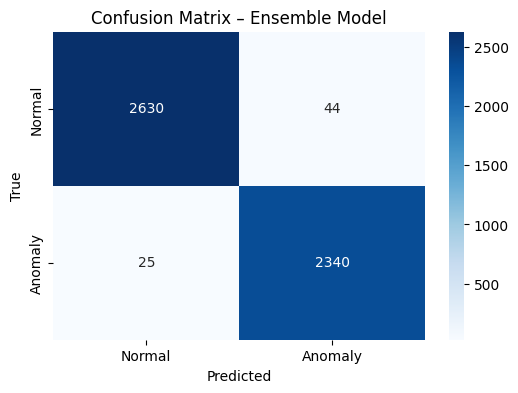

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Ensemble Model")
plt.show()
plt.close()


In [19]:
# Save model and encoders
model.save("dnn_ids_model.h5")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_protocol, "le_protocol.pkl")
joblib.dump(le_service, "le_service.pkl")
joblib.dump(le_flag, "le_flag.pkl")

['le_flag.pkl']